In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zoo_data=pd.read_csv("//Users//sreeramkn//Downloads//Zoo.csv")
zoo_data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### Initial investigation

In [3]:
zoo_data.shape

(101, 18)

In [4]:
zoo_data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
zoo_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

Number of features and records in the given data set is 11 and 400 respesctively

There is no null values in the data set

In [6]:
zoo_data['animal name'].nunique()

100

In [7]:
zoo_data['type'].unique()

array([1, 4, 2, 7, 6, 5, 3])

### Model building

In [8]:
x=zoo_data.iloc[:,1:-1]
y=zoo_data.iloc[:,-1:]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Model training

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=11)

In [12]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

### Model testing

In [13]:
y_pred=knn_model.predict(x_test)

### Model evalution

In [14]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [15]:
print(accuracy_score(y_test,y_pred))

0.9047619047619048


In [16]:
print(confusion_matrix(y_test,y_pred))

[[9 0 1 0 0]
 [0 4 0 0 0]
 [0 0 4 0 0]
 [0 0 0 2 0]
 [0 0 1 0 0]]


<AxesSubplot:>

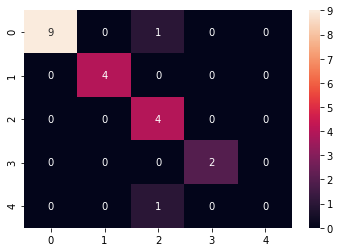

In [17]:
confusion_matrix_test=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix_test,annot=True)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00         4
           4       0.67      1.00      0.80         4
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         1

    accuracy                           0.90        21
   macro avg       0.73      0.78      0.75        21
weighted avg       0.89      0.90      0.89        21



### Tweaking K value

In [19]:
for i in range(1,50,2):
    knn_model=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_pred=knn_model.predict(x_test)
    print('K value is: ',i)
    print(accuracy_score(y_test,y_pred))

K value is:  1
1.0
K value is:  3
1.0
K value is:  5
0.9523809523809523
K value is:  7
0.9047619047619048
K value is:  9
0.9047619047619048
K value is:  11
0.9047619047619048
K value is:  13
0.9047619047619048
K value is:  15
0.9047619047619048
K value is:  17
0.9047619047619048
K value is:  19
0.9047619047619048
K value is:  21
0.9047619047619048
K value is:  23
0.8571428571428571
K value is:  25
0.8095238095238095
K value is:  27
0.6190476190476191
K value is:  29
0.6190476190476191
K value is:  31
0.6190476190476191
K value is:  33
0.6190476190476191
K value is:  35
0.6190476190476191
K value is:  37
0.6190476190476191
K value is:  39
0.6190476190476191
K value is:  41
0.6190476190476191
K value is:  43
0.6190476190476191
K value is:  45
0.5714285714285714
K value is:  47
0.6190476190476191
K value is:  49
0.6190476190476191


By comparing the above obtained accuaracy, the model behaves good when the value of K is 3 or 5

In [20]:
knn_model=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print('K value is: ',3)
print(accuracy_score(y_test,y_pred))

K value is:  3
0.6190476190476191


In [21]:
knn_model=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print('K value is: ',5)
print(accuracy_score(y_test,y_pred))

K value is:  5
0.6190476190476191
